In [5]:
import strawberryfields as sf
from strawberryfields.ops import *
from strawberryfields.utils import scale
from numpy import pi, sqrt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Generation of GKP state

"Generation of GKP states with optical states"

/Users/ryunagai/.pyenv/versions/3.6.5/envs/main_env/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure


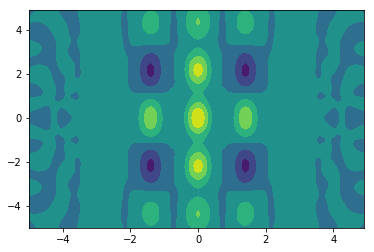

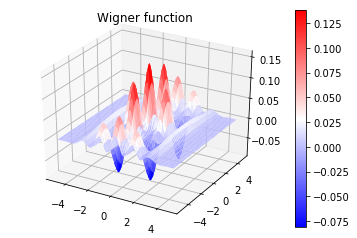

In [99]:
eng, q = sf.Engine(2)

p = 0 # 0: even, 1: odd
param = 4

# Amp. of cat states
alpha_0 = param
alpha_1 = param

# Squeezing
eta_0 = np.log(param)
eta_1 = np.log(param)

theta = np.arctan(1)
R = 0

with eng:
    Catstate(alpha = alpha_0, p = p)  | q[0]
    Catstate(alpha = alpha_1, p = p)  | q[1]
    
    Sgate(eta_0) | q[0]
    Sgate(eta_1) | q[1]
    
    BSgate(theta) | q[0:2]
    MeasureHomodyne(np.pi / 2, select = R) | q[1]
    
state = eng.run('fock', cutoff_dim=30)
lim = 5

x = np.arange(-1*lim, lim, 0.1)
p = np.arange(-1*lim, lim, 0.1)

W = state.wigner(0, x, p)
X, P = np.meshgrid(x, p)
plt.contourf(X, P, W)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, P, W, cmap='bwr', linewidth=0)
fig.colorbar(surf)
ax.set_title("Wigner function")
fig.show()

83.01729542861304

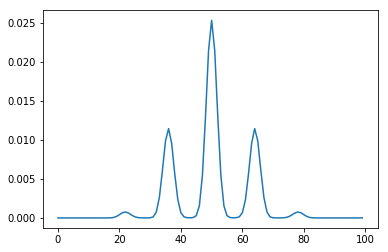

In [110]:
plt.plot(state.wigner(0, x, 0).flatten()**2) # p=0におけるWigner functionの断面
np.sum(W)

## to create state with more peaks

In [ ]:
eng, q = sf.Engine(4)

p = 0 # 0: even, 1: odd
param = 4

# Amp. of cat states
alpha_0 = param
alpha_1 = param

# Squeezing
eta_0 = np.log(param)
eta_1 = np.log(param)

theta = np.arctan(1)
R = 0

with eng:
    Catstate(alpha = alpha_0, p = p)  | q[0]
    Catstate(alpha = -alpha_1, p = p)  | q[1]
    
    Sgate(eta_0) | q[0]
    Sgate(eta_1) | q[1]
    
    BSgate(theta) | q[0:2]
    MeasureHomodyne(np.pi / 2, select = R) | q[1]
    
state = eng.run('fock', cutoff_dim=30)
lim = 5

x = np.arange(-1*lim, lim, 0.1)
p = np.arange(-1*lim, lim, 0.1)

W = state.wigner(0, x, p)
X, P = np.meshgrid(x, p)
plt.contourf(X, P, W)